## Using NY Times APIs

What are APIs?

Structured ways people can give you their data.

Why?

Usually because they want to help web/mobile developers attract more users to their service.

Twitter doesn't have an API to help you out.

They want developers to build apps to drive more eyeballs to their service.

![](https://raw.github.com/nealcaren/workshop_2014/master/notebooks/images/times_inequality.png)

No love with the scrape!!!

![](https://raw.github.com/nealcaren/workshop_2014/master/notebooks/images/no_luck.png)

In [1]:
import requests

Do me a favor and sign up to be a [developer](http://developer.nytimes.com) with the New York Times and get your own API key.

In [49]:
my_times_api_key = 'b565d8cd98f84bd487728a44142e5ee4'

APIs can be accessed like a normal URL, but they are often very long, complicated, and involve variables you want to change. For example, you can get the information about the first 10 articles published in the New York Times that used the word "food" with:

[http://api.nytimes.com/svc/search/v2/articlesearch.json?sort=newest&begin_date=20170101&end_date=20171015&api-key=d20bc9ac37156ecc4cb3d78eb956201d%3A0%3A54059647&q=food&page=0](http://api.nytimes.com/svc/search/v2/articlesearch.json?sort=newest&begin_date=20170101&end_date=20171015&api-key=d20bc9ac37156ecc4cb3d78eb956201d%3A0%3A54059647&q=food&page=0)

Requests allows you to do this in a more civilized way.

In [16]:
payload = {'q'         : 'food', 
           'begin_date': '20170101' ,
           'end_date'  : '20171015',
           'api-key'   :  my_times_api_key,
           'sort'      : 'oldest' ,
           'offset'    :  20}

base_url = 'http://api.nytimes.com/svc/search/v2/articlesearch.json?'

In [48]:
r = requests.get(base_url, params = payload)

#r.url

In [18]:
r.text

u'{"status":"OK","copyright":"Copyright (c) 2017 The New York Times Company. All Rights Reserved.","response":{"docs":[{"web_url":"https://cooking.nytimes.com/recipes/1018491-butternut-squash-and-green-curry-soup","snippet":"This creamy, vibrant soup is a Thai-inspired version of the pur\xe9ed squash soup you know and love. The green curry paste, which is relatively easy to find in the international aisle of the grocery store, along with coconut milk and fish sauce, perf...","print_page":"0","blog":{},"source":"du_recipe","multimedia":[{"type":"image","subtype":"thumbnail","url":"images/2017/01/11/dining/11SOUPS24/11SOUPS24-thumbStandard.jpg","height":75,"width":75,"rank":1,"legacy":{}},{"type":"image","subtype":"large","url":"images/2017/01/11/dining/11SOUPS24/11SOUPS24-articleLarge.jpg","height":401,"width":600,"rank":1,"legacy":{}}],"headline":{"main":"","name":"Butternut Squash and Green Curry Soup"},"keywords":[],"pub_date":"2017-01-11T05:00:00+0000","document_type":"recipe","byli

In [19]:
r.json()

{u'copyright': u'Copyright (c) 2017 The New York Times Company. All Rights Reserved.',
 u'response': {u'docs': [{u'_id': u'5873e84195d0e03926079c25',
    u'blog': {},
    u'byline': {u'original': u'Samin Nosrat'},
    u'document_type': u'recipe',
    u'headline': {u'main': u'',
     u'name': u'Butternut Squash and Green Curry Soup'},
    u'keywords': [],
    u'multimedia': [{u'height': 75,
      u'legacy': {},
      u'rank': 1,
      u'subtype': u'thumbnail',
      u'type': u'image',
      u'url': u'images/2017/01/11/dining/11SOUPS24/11SOUPS24-thumbStandard.jpg',
      u'width': 75},
     {u'height': 401,
      u'legacy': {},
      u'rank': 1,
      u'subtype': u'large',
      u'type': u'image',
      u'url': u'images/2017/01/11/dining/11SOUPS24/11SOUPS24-articleLarge.jpg',
      u'width': 600}],
    u'print_page': u'0',
    u'pub_date': u'2017-01-11T05:00:00+0000',
    u'score': 0.0759043,
    u'snippet': u'This creamy, vibrant soup is a Thai-inspired version of the pur\xe9ed squash s

In [20]:
json = r.json()


In [21]:
json.keys()

[u'status', u'response', u'copyright']

In [23]:
json['status']

u'OK'

Output from `json['response']` ommitted because it was really long.

In [24]:
json['response']['docs']

[{u'_id': u'5873e84195d0e03926079c25',
  u'blog': {},
  u'byline': {u'original': u'Samin Nosrat'},
  u'document_type': u'recipe',
  u'headline': {u'main': u'',
   u'name': u'Butternut Squash and Green Curry Soup'},
  u'keywords': [],
  u'multimedia': [{u'height': 75,
    u'legacy': {},
    u'rank': 1,
    u'subtype': u'thumbnail',
    u'type': u'image',
    u'url': u'images/2017/01/11/dining/11SOUPS24/11SOUPS24-thumbStandard.jpg',
    u'width': 75},
   {u'height': 401,
    u'legacy': {},
    u'rank': 1,
    u'subtype': u'large',
    u'type': u'image',
    u'url': u'images/2017/01/11/dining/11SOUPS24/11SOUPS24-articleLarge.jpg',
    u'width': 600}],
  u'print_page': u'0',
  u'pub_date': u'2017-01-11T05:00:00+0000',
  u'score': 0.0759043,
  u'snippet': u'This creamy, vibrant soup is a Thai-inspired version of the pur\xe9ed squash soup you know and love. The green curry paste, which is relatively easy to find in the international aisle of the grocery store, along with coconut milk and fis

In [25]:
json['response']['meta']['hits']

5184

In [28]:
from time import sleep

base_url = 'http://api.nytimes.com/svc/search/v2/articlesearch.json?'

payload = { 'q'         : 'food', 
            'api-key'   :  my_times_api_key,
            'sort'      : 'newest' ,
            'page'      :  0}
    
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016]
counts = []
for year in years:
 
    
    year_string = str(year)
    payload['begin_date'] = year_string + '0101'
    payload['end_date']   = year_string + '1231'
    r = requests.get(base_url, params = payload)
    json = r.json()
    count  = json['response']['meta']['hits']
    counts.append(count)
    sleep(.1)   

This can be plotted in Python.

Populating the interactive namespace from numpy and matplotlib


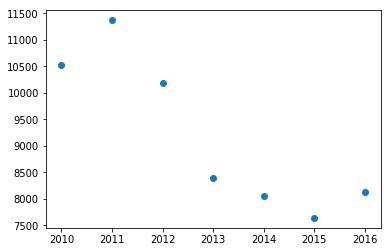

In [29]:
%pylab inline
import matplotlib.pyplot as plt

plt.scatter(years,counts)
plt.ticklabel_format(useOffset=False)

Your turn. Modify the script below to output a csv with the monthly total of "food" articles. For an extra challenge, add an additional column with the count of the number of "food security" articles.